## CART (Classification and Regression Trees) Models

### Assignment
#### Requirements:
- Download the following datasets and perform the necessary preprocessing depending on the task assigned to the dataset.
    - Bank Marketing Dataset (Classification, target = "bank term deposit")
    - U.S. Pollution Dataset (Regression, target = "CO AQI")
- Perform EDA on both datasets
- Build a Random Forest model for each
- Report appropriate evaluation metrics for each
- Compare the results of your test data to your train and baseline model


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

from sklearn import tree

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline




from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


#plt.style.use("seaborn")

## Bank dataset

### loding and data Information 

In [2]:
#Loading data
df =  pd.read_csv('bank-full.csv')
print(df.shape)

(45211, 17)


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
#Describe all categorical features

df.describe(exclude="number")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


### data cleaning


In [7]:
df["y"] = df["y"].replace('yes',1) 
df["y"] = df["y"].replace('no',0) 


In [8]:
df["marital"] = df["marital"].replace('married',1) 
df["marital"] = df["marital"].replace('single',2) 
df["marital"] = df["marital"].replace('divorced',3) 


In [9]:
df["education"] = df["education"].replace('secondary',1) 
df["education"] = df["education"].replace('tertiary',2) 
df["education"] = df["education"].replace('primary',3) 
df["education"] = df["education"].replace('unknown',4) 


In [10]:
df["default"] = df["default"].replace('yes',1) 
df["default"] = df["default"].replace('no',0) 


In [11]:
df["housing"] = df["housing"].replace('yes',1) 
df["housing"] = df["housing"].replace('no',0) 


In [12]:
df["loan"] = df["loan"].replace('yes',1) 
df["loan"] = df["loan"].replace('no',1) 


In [13]:
df["month"] = df["month"].replace('jan',1) 
df["month"] = df["month"].replace('feb',2) 
df["month"] = df["month"].replace('mar',3) 
df["month"] = df["month"].replace('apr',4) 
df["month"] = df["month"].replace('may',5) 
df["month"] = df["month"].replace('jun',6) 
df["month"] = df["month"].replace('jul',7) 
df["month"] = df["month"].replace('aug',8) 
df["month"] = df["month"].replace('sep',9) 
df["month"] = df["month"].replace('oct',10) 
df["month"] = df["month"].replace('nov',11) 
df["month"] = df["month"].replace('dec',12) 


In [14]:
df.describe()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.0,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1.513238,1.720488,0.018027,1362.272058,0.555838,1.0,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.692948,0.866553,0.133049,3044.765829,0.496878,0.0,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,1.000000,0.000000,-8019.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,0.000000,72.000000,0.000000,1.0,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,1.000000,1.000000,0.000000,448.000000,1.000000,1.0,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,1.0,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,3.000000,4.000000,1.000000,102127.000000,1.000000,1.0,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


### Data after cleaning

In [15]:
df = pd.DataFrame (df, columns = ['age','balance','day','duration','campaign','pdays','previous','marital','education','default','housing','loan','month','y'])
df.head()

,age,balance,day,duration,campaign,pdays,previous,marital,education,default,housing,loan,month,y
0,58,2143,5,261,1,-1,0,1,2,0,1,1,5,0
1,44,29,5,151,1,-1,0,2,1,0,1,1,5,0
2,33,2,5,76,1,-1,0,1,1,0,1,1,5,0
3,47,1506,5,92,1,-1,0,1,4,0,1,1,5,0
4,33,1,5,198,1,-1,0,2,4,0,0,1,5,0


### Split the data

In [16]:
# Save X data
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


### Feature Scaling

In [18]:
sc = StandardScaler()

# The scaling will be between 3 and -3 

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression

In [19]:
# Apply LR
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# score 
lr.score(x_test, y_test)

# prediction 
y_pred = lr.predict(x_test)

In [20]:
# The coef for the x variables 
lr.coef_

array([[-0.02104214,  0.09045367, -0.02558495,  1.00299203, -0.42777233,
         0.29830698,  0.17857837,  0.14208631, -0.00158994, -0.08177026,
        -0.62571628,  0.        ,  0.03003774]])

In [21]:
# the intercept
lr.intercept_


array([-2.56121057])

### Confusion Matrix

In [22]:
def calc_cost(y_true, y_predict):

    result_dict = {}
    
    accuracy = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    recall    = recall_score(y_true, y_predict)


    ls = [accuracy, precision, recall] # Appropriate for classification
    ls2 = ["Accuracy_Score", "Precision_Score", "Recall_Score"] # Appropriate for classification

    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
        
    return result_dict

# save results to object and print results

print("Baseline")
# baseline model (Majority Class) was 0
b_preds = [0 for x in range(len(y_train))]
res0 = calc_cost(y_train, b_preds)

print("\nTrain logestic Regression")
res1 = calc_cost(y_train, lr.predict(x_train))

print("\nTest logestic Regression")
res1_t = calc_cost(y_test, lr.predict(x_test))


Baseline
Accuracy_Score: 0.8830954347056742
Precision_Score: 0.0
Recall_Score: 0.0

Train logestic Regression
Accuracy_Score: 0.8904978176241595
Precision_Score: 0.5937266616878267
Recall_Score: 0.2005549949545913

Test logestic Regression
Accuracy_Score: 0.888436698221711
Precision_Score: 0.5692640692640693
Recall_Score: 0.19849056603773585


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [23]:
class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [24]:
class_forest.fit(x_train, y_train)
preds_class = class_forest.predict(x_test)

In [25]:
train_acc = round(class_forest.score(x_train, y_train),2)
test_acc = round(class_forest.score(x_test, y_test),2)

print(f'Training Accuracy: {train_acc}')
print(f'Test Set Accuracy: {test_acc}')

Training Accuracy: 0.99
Test Set Accuracy: 0.89


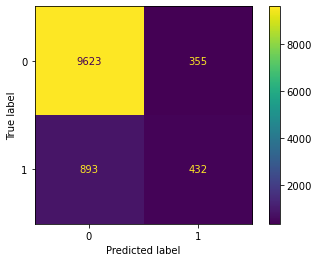

In [26]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_forest, x_test, y_test);

- From above results we found that the best acurancy score was by using Logistic regression with Random forest 

## US pollution Dataset

### load in the Data

In [27]:
#Loading data
df1 = pd.read_csv("pollution_us_2000_2016.csv") 
print(df1.shape)

(1746661, 29)


In [28]:
df1 = pd.DataFrame (df1, columns = ['NO2 Mean','NO2 1st Max Value','NO2 AQI','O3 Mean','O3 1st Max Value',
                                 'O3 AQI', 'SO2 Mean','SO2 1st Max Value', 'SO2 AQI','CO Mean','CO 1st Max Value','CO AQI' ])
df1.head()

,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
0,19.041667,49.0,46,0.022500,0.040,34,3.000000,9.0,13.0,1.145833,4.2,NaN
1,19.041667,49.0,46,0.022500,0.040,34,3.000000,9.0,13.0,0.878947,2.2,25.0
2,19.041667,49.0,46,0.022500,0.040,34,2.975000,6.6,NaN,1.145833,4.2,NaN
3,19.041667,49.0,46,0.022500,0.040,34,2.975000,6.6,NaN,0.878947,2.2,25.0
4,22.958333,36.0,34,0.013375,0.032,27,1.958333,3.0,4.0,0.850000,1.6,NaN


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   NO2 Mean           float64
 1   NO2 1st Max Value  float64
 2   NO2 AQI            int64  
 3   O3 Mean            float64
 4   O3 1st Max Value   float64
 5   O3 AQI             int64  
 6   SO2 Mean           float64
 7   SO2 1st Max Value  float64
 8   SO2 AQI            float64
 9   CO Mean            float64
 10  CO 1st Max Value   float64
 11  CO AQI             float64
dtypes: float64(10), int64(2)
memory usage: 159.9 MB


In [30]:
df1.describe()

,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,873338.000000
mean,1.282193e+01,2.541485e+01,2.389822e+01,2.612485e-02,3.920331e-02,3.605012e+01,1.870364e+00,4.492185e+00,7.115945,3.682177e-01,6.201067e-01,5.996595
std,9.504814e+00,1.599963e+01,1.516280e+01,1.136974e-02,1.534362e-02,1.978042e+01,2.760435e+00,7.679866e+00,11.937473,3.140231e-01,6.439361e-01,5.851836
min,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000
25%,5.750000e+00,1.300000e+01,1.200000e+01,1.787500e-02,2.900000e-02,2.500000e+01,2.565220e-01,8.000000e-01,1.000000,1.834580e-01,2.920000e-01,2.000000
50%,1.073913e+01,2.400000e+01,2.300000e+01,2.587500e-02,3.800000e-02,3.300000e+01,9.875000e-01,2.000000e+00,3.000000,2.926250e-01,4.000000e-01,5.000000
75%,1.771364e+01,3.570000e+01,3.300000e+01,3.391700e-02,4.800000e-02,4.200000e+01,2.325000e+00,5.000000e+00,9.000000,4.666670e-01,8.000000e-01,8.000000
max,1.395417e+02,2.670000e+02,1.320000e+02,9.508300e-02,1.410000e-01,2.180000e+02,3.216250e+02,3.510000e+02,200.000000,7.508333e+00,1.990000e+01,201.000000


In [31]:
df1.isnull().sum()

NO2 Mean                  0
NO2 1st Max Value         0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO AQI               873323
dtype: int64

### Cleaning The data 

In [32]:
# Backwards filling

df1.ffill(axis = 0, inplace = True)

df1.bfill(axis = 0, inplace = True)


### Spliting the data

In [33]:
# Save X data
x = df1.iloc[:, 0:-1]
y = df1.iloc[:, -1]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=2)

In [35]:
# Make a simple linear regression model
simp_lr = LinearRegression(fit_intercept=True, normalize=False)
simp_lr.fit(pd.DataFrame(x_train), y_train)
predictions = simp_lr.predict(pd.DataFrame(x_test))

In [36]:
simp_lr.intercept_

0.019766814342292882

In [37]:
simp_lr.coef_

array([ 3.04382727e-03, -2.72371930e-03,  2.97662039e-02,  5.23529202e+00,
       -1.07210052e+01, -9.18570909e-04, -1.87210140e-02, -1.02803800e-02,
        5.81666051e-03,  9.73130299e+00,  3.33702453e+00])

In [38]:
r2_score(y_true=y_test, y_pred=predictions)

0.8238411347862014

In [39]:
def calc_pol(y_true, y_predict):

    result_dict = {}

    mse = mean_squared_error(y_true, y_predict) 
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse] 
    ls2 = ["MSE", "MAE", "RMSE"]
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
        
    return result_dict

# save results to object and print results

print("Baseline")
# baseline model (Majority Class) was 0
b_preds = [0 for x in range(len(y_train))]
res0 = calc_pol(y_train, b_preds)

print("\nTrain Linear Regression")
res1 = calc_pol(y_train, simp_lr.predict(x_train))

print("\nTest Linear Regression")
res1 = calc_pol(y_test, simp_lr.predict(x_test))

Baseline
MSE: 70.29830037519227
MAE: 5.998844270397979
RMSE: 8.384408170836643

Train Linear Regression
MSE: 6.028710737978882
MAE: 1.246193222431209
RMSE: 2.455343303487087

Test Linear Regression
MSE: 5.988188431724511
MAE: 1.246610792738187
RMSE: 2.4470775287523097


### Random Forest

In [40]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')
reg_forest.fit(x_train, y_train)

preds_forest = simp_lr.predict(x_test)
mean_absolute_error(y_true=y_test, y_pred=preds_forest)

1.246610792738187

In [41]:
#MSE
mean_squared_error(y_true=y_test, y_pred=preds_forest, squared=False)

2.4470775287523097

In [42]:
#RMSE
mean_squared_error(y_true=y_test, y_pred=preds_forest)

5.988188431724511

In [43]:
reg_forest.feature_importances_

array([0.02247745, 0.01076388, 0.00737587, 0.0209302 , 0.00971351,
       0.00879874, 0.02663596, 0.01751706, 0.00773651, 0.23348147,
       0.63456935])

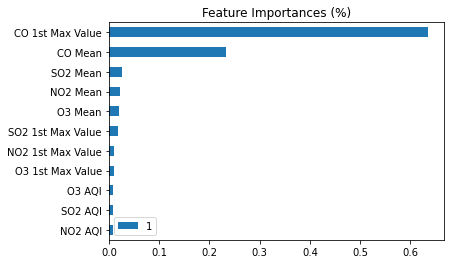

In [44]:
# Plot Feature Importances to Visualize better

pd.DataFrame(dict(zip(x_train.columns, reg_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

- From above redult we found that the minimum mse was by using Random Forest Model.